In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 读入数据
data = pd.read_csv('data/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


In [3]:
# 查看正反样例数目
print('正样例数量为{}，反样例数量为{}'.format(len(data[data.target == 1]), len(data[data.target == 0])))

正样例数量为83，反样例数量为220


In [4]:
numerical_vals = data.columns[:-2]
categorical_vals = data.columns[-2:-1]
label_vals = data.columns[-1:]
(numerical_vals, categorical_vals, label_vals)

(Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca'],
       dtype='object'),
 Index(['thal'], dtype='object'),
 Index(['target'], dtype='object'))

In [5]:
# 对数据进行归一化
def normalize(column):
    max_number = data[column].max()
    min_number = data[column].min()
    # assert max_number != min_number, 'max == min in COLUMN {0}'.format(name)
    return data[column].map(lambda x: float(x - min_number) / float(max_number - min_number))

for cl in numerical_vals:
    data[cl] = normalize(cl)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,0.25,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,fixed,0
1,0.791667,1.0,1.00,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,normal,1
2,0.791667,1.0,1.00,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,reversible,0
3,0.166667,1.0,0.75,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,normal,0
4,0.250000,0.0,0.50,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,normal,0
5,0.562500,1.0,0.50,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.000000,normal,0
6,0.687500,0.0,1.00,0.433962,0.324201,0.0,1.0,0.679389,0.0,0.580645,1.0,0.666667,normal,1
7,0.583333,0.0,1.00,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,normal,0
8,0.708333,1.0,1.00,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,reversible,1
9,0.500000,1.0,1.00,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.000000,reversible,0


In [6]:
# 对分类数据进行one-hot编码
one_hot = pd.get_dummies(data[categorical_vals])

In [7]:
data = data.drop(categorical_vals, axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,0.708333,1.0,0.25,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0
1,0.791667,1.0,1.00,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1
2,0.791667,1.0,1.00,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,0
3,0.166667,1.0,0.75,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0
4,0.250000,0.0,0.50,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0
5,0.562500,1.0,0.50,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.000000,0
6,0.687500,0.0,1.00,0.433962,0.324201,0.0,1.0,0.679389,0.0,0.580645,1.0,0.666667,1
7,0.583333,0.0,1.00,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,0
8,0.708333,1.0,1.00,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,1
9,0.500000,1.0,1.00,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.000000,0


In [8]:
data = pd.concat([data, one_hot], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_fixed,thal_normal,thal_reversible
0,0.708333,1.0,0.25,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0,1,0,0
1,0.791667,1.0,1.00,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1,0,1,0
2,0.791667,1.0,1.00,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,0,0,0,1
3,0.166667,1.0,0.75,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0,0,1,0
4,0.250000,0.0,0.50,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0,0,1,0
5,0.562500,1.0,0.50,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,0.0,0.000000,0,0,1,0
6,0.687500,0.0,1.00,0.433962,0.324201,0.0,1.0,0.679389,0.0,0.580645,1.0,0.666667,1,0,1,0
7,0.583333,0.0,1.00,0.245283,0.520548,0.0,0.0,0.702290,1.0,0.096774,0.0,0.000000,0,0,1,0
8,0.708333,1.0,1.00,0.339623,0.292237,0.0,1.0,0.580153,0.0,0.225806,0.5,0.333333,1,0,0,1
9,0.500000,1.0,1.00,0.433962,0.175799,1.0,1.0,0.641221,1.0,0.500000,1.0,0.000000,0,0,0,1


In [9]:
# 打乱数据
data = data.sample(frac=1).reset_index(drop=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_fixed,thal_normal,thal_reversible
0,0.625000,1.0,0.00,0.660377,0.114155,1.0,0.0,0.145038,0.0,0.161290,0.0,0.666667,0,1,0,0
1,0.583333,0.0,1.00,0.320755,0.404110,0.0,1.0,0.671756,0.0,0.000000,0.0,0.333333,0,0,1,0
2,0.729167,0.0,1.00,0.339623,0.404110,0.0,0.0,0.389313,0.0,0.322581,0.5,0.666667,0,0,1,0
3,0.604167,0.0,0.50,0.396226,0.440639,1.0,1.0,0.618321,0.0,0.000000,0.0,0.666667,1,0,1,0
4,0.354167,0.0,0.75,0.452830,0.116438,0.0,1.0,0.679389,1.0,0.225806,1.0,0.000000,0,0,1,0
5,0.541667,0.0,1.00,0.320755,0.180365,0.0,0.5,0.450382,1.0,0.322581,0.5,0.333333,1,0,0,1
6,0.708333,0.0,1.00,0.132075,0.326484,0.0,0.0,0.748092,1.0,0.290323,0.5,0.666667,0,0,1,0
7,0.125000,1.0,1.00,0.245283,0.164384,0.0,0.0,0.450382,1.0,0.258065,0.5,0.000000,0,0,0,1
8,0.750000,1.0,0.25,0.415094,0.356164,1.0,1.0,0.786260,0.0,0.225806,0.5,0.333333,0,0,1,0
9,0.541667,0.0,1.00,0.811321,0.458904,0.0,0.5,0.351145,1.0,0.548387,0.5,0.000000,1,0,1,0


In [10]:
# 划分训练集。验证集和测试集
train_data, test_data = train_test_split(data, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)
print(len(train_data), 'train examples')
print(len(val_data), 'validation examples')
print(len(test_data), 'test examples')
type(train_data)

193 train examples
49 validation examples
61 test examples


pandas.core.frame.DataFrame

## 未添加样本权重

In [11]:
def df_to_dataset(data, shuffle=False, batch_size=32):
    data = data.copy()
    label = data[label_vals]
    data = data.drop(label_vals, axis=1)
    data = np.array(data)
    label = np.array(label)
    dataset = tf.data.Dataset.from_tensor_slices((data, label))
    # 查看样例数据维度
    for d, l in dataset.take(1):
        break
    print('样例数据维度为：{}'.format(d.numpy().shape))
    dataset = dataset.batch(batch_size)
    
    if shuffle:
        dataset = dataset.repeat()
        dataset = dataset.shuffle(buffer_size=len(data))
        
    return dataset

BATCH_SIZE = 8
train_set = df_to_dataset(train_data, shuffle=True, batch_size=BATCH_SIZE)
val_set = df_to_dataset(val_data, batch_size=BATCH_SIZE)
test_set = df_to_dataset(test_data, batch_size=BATCH_SIZE)

样例数据维度为：(15,)
样例数据维度为：(15,)
样例数据维度为：(15,)


## 未添加类权重

In [12]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, input_shape=[15], activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_1.summary()
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer='adam',
               metrics=[tf.keras.metrics.AUC(), 'accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model_1.fit(train_set, epochs=100, steps_per_epoch=int(np.ceil(len(train_data) / float(BATCH_SIZE))),
                   validation_data=val_set, validation_steps=int(np.ceil(len(val_data) / float(BATCH_SIZE))),
                   verbose=1)

W0729 15:18:40.950092 18624 deprecation.py:323] From C:\Users\arsener\PycharmProjects\tensorflow2.0beta\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
25/25 [==============================] - 1s 38ms/step - loss: 0.7034 - auc: 0.5358 - accuracy: 0.5250 - val_loss: 0.6778 - val_auc: 0.4418 - val_accuracy: 0.5918
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6290 - auc: 0.5776 - accuracy: 0.6800 - val_loss: 0.5851 - val_auc: 0.6276 - val_accuracy: 0.7347
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5566 - auc: 0.8126 - accuracy: 0.7358 - val_loss: 0.5209 - val_auc: 0.8316 - val_accuracy: 0.7347
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4890 - auc: 0.8700 - accuracy: 0.7409 - val_loss: 0.4740 - val_auc: 0.8653 - val_accuracy: 0.7347
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4451 - auc: 0.8721 - accuracy: 0.7486 - val_loss: 0.4389 - val_auc: 0.8969 - val_accuracy: 0.7755
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4933 - auc: 0.8563 - accuracy: 0.7250 - val_loss: 0.4120 - 

25/25 [==============================] - 0s 4ms/step - loss: 0.2567 - auc: 0.9522 - accuracy: 0.9150 - val_loss: 0.2443 - val_auc: 0.9429 - val_accuracy: 0.8776
Epoch 96/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3191 - auc: 0.9172 - accuracy: 0.8653 - val_loss: 0.2519 - val_auc: 0.9398 - val_accuracy: 0.8776
Epoch 97/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2709 - auc: 0.9451 - accuracy: 0.8912 - val_loss: 0.2493 - val_auc: 0.9327 - val_accuracy: 0.8776
Epoch 98/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2475 - auc: 0.9592 - accuracy: 0.8950 - val_loss: 0.2474 - val_auc: 0.9357 - val_accuracy: 0.8776
Epoch 99/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2643 - auc: 0.9527 - accuracy: 0.8860 - val_loss: 0.2448 - val_auc: 0.9398 - val_accuracy: 0.8776
Epoch 100/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3156 - auc: 0.9150 - accuracy: 0.8290 - val_loss: 0.2522 - val_auc

In [14]:
model_1.evaluate(test_set)

8/8 [==============================] - 0s 9ms/step - loss: 0.2963 - auc: 0.9151 - accuracy: 0.8525


[0.29628038220107555, 0.9150641, 0.852459]

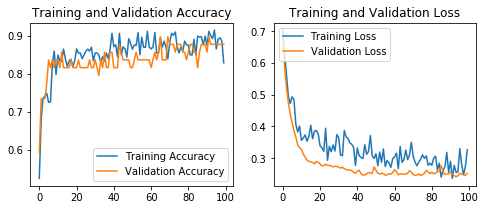

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

## 添加类权重

In [16]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, input_shape=[15], activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_2.summary()
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer='adam',
               metrics=[tf.keras.metrics.AUC(), 'accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [17]:
class_0 = len(train_data[train_data.target == 0])
class_1 = len(train_data[train_data.target == 1])
weight = round(class_0 * 1. / class_1)
print('weight: {0} / {1} = {2:.4} ~= {3}'.format(class_0, class_1, class_0 * 1. / class_1, weight))
class_weight = {0: 1., 1:weight}
history = model_2.fit(train_set, epochs=100, steps_per_epoch=int(np.ceil(len(train_data) / float(BATCH_SIZE))),
                   validation_data=val_set, validation_steps=int(np.ceil(len(val_data) / float(BATCH_SIZE))),
                   class_weight=class_weight,
                   verbose=1)

weight: 137 / 56 = 2.446 ~= 2
Epoch 1/100
25/25 [==============================] - 1s 45ms/step - loss: 0.9222 - auc_1: 0.5243 - accuracy: 0.6250 - val_loss: 0.6507 - val_auc_1: 0.8449 - val_accuracy: 0.7959
Epoch 2/100
25/25 [==============================] - 1s 41ms/step - loss: 0.8178 - auc_1: 0.8221 - accuracy: 0.7650 - val_loss: 0.5949 - val_auc_1: 0.9439 - val_accuracy: 0.8571
Epoch 3/100
25/25 [==============================] - 1s 48ms/step - loss: 0.7592 - auc_1: 0.8573 - accuracy: 0.7772 - val_loss: 0.5426 - val_auc_1: 0.9602 - val_accuracy: 0.8980
Epoch 4/100
25/25 [==============================] - 1s 46ms/step - loss: 0.6866 - auc_1: 0.8826 - accuracy: 0.8187 - val_loss: 0.4703 - val_auc_1: 0.9643 - val_accuracy: 0.8571
Epoch 5/100
25/25 [==============================] - 1s 50ms/step - loss: 0.6247 - auc_1: 0.8901 - accuracy: 0.8436 - val_loss: 0.4354 - val_auc_1: 0.9592 - val_accuracy: 0.8776
Epoch 6/100
25/25 [==============================] - 1s 42ms/step - loss: 0.7010

Epoch 92/100
25/25 [==============================] - 3s 102ms/step - loss: 0.2803 - auc_1: 0.9731 - accuracy: 0.9016 - val_loss: 0.2692 - val_auc_1: 0.9327 - val_accuracy: 0.8571
Epoch 93/100
25/25 [==============================] - 2s 93ms/step - loss: 0.3335 - auc_1: 0.9564 - accuracy: 0.9150 - val_loss: 0.2704 - val_auc_1: 0.9347 - val_accuracy: 0.8367
Epoch 94/100
25/25 [==============================] - 3s 140ms/step - loss: 0.2967 - auc_1: 0.9606 - accuracy: 0.8925 - val_loss: 0.2709 - val_auc_1: 0.9337 - val_accuracy: 0.8571
Epoch 95/100
25/25 [==============================] - 2s 83ms/step - loss: 0.3184 - auc_1: 0.9633 - accuracy: 0.8900 - val_loss: 0.2705 - val_auc_1: 0.9337 - val_accuracy: 0.8367
Epoch 96/100
25/25 [==============================] - 2s 91ms/step - loss: 0.3751 - auc_1: 0.9455 - accuracy: 0.8756 - val_loss: 0.2773 - val_auc_1: 0.9306 - val_accuracy: 0.8571
Epoch 97/100
25/25 [==============================] - 2s 91ms/step - loss: 0.3155 - auc_1: 0.9590 - acc

In [18]:
model_2.evaluate(test_set)

8/8 [==============================] - 0s 12ms/step - loss: 0.3282 - auc_1: 0.9095 - accuracy: 0.8852


[0.3282212261110544, 0.90945506, 0.8852459]

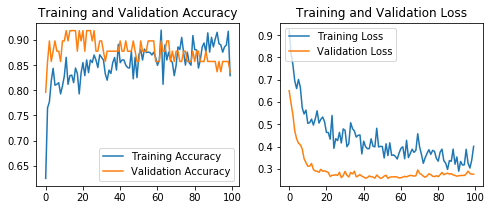

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()